In [39]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [44]:
### import modules
from utils import run_modified_seir, run_modified_seir_cont, seir
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from plot import plot_timeseries_cat, plot_timeseries

# Time-Series Plots - Instantaneous Vaccination

Here we generate time-series plots using a specific $R_0$ value and vaccine efficacy, to model and compare the population dynamics of the two modes of vaccine failure ('leaky', 'all-or-nothing'), focusing on the infected population, the cumulative infected population from $V$ ($V_S + V_R$) vs. from $S$, and the recovered population. In order to determine regimes in which the two vaccine failure modes yield a significant diference in population dynamics, we define 9 scenarios based on vaccination timing ($t_V$) and the fraction of population that is vaccinated ($f_V$).The following 9 scenarios are investigated: 
- Vaccine administered when the recovered population is 0, 50% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0, 75% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0, 100% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.1, 50% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.1, 75% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.1, 100% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.25, 50% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.25, 75% of the remaining susceptible population at $t_V$ is vaccinated
- Vaccine administered when the recovered population is 0.25, 100% of the remaining susceptible population at $t_V$ is vaccinated

The scenarios are explained in more detail in [1_Scenarios](../Scenarios/1_Scenarios.ipynb). Note that we refer to these scenarios as '$t_V$: $R = 0$, $f_V$: 50% of $(1 - f_R)$', '$t_V$: $R = 0$, $f_V$: 75% of $(1 - f_R)$', and so on, where $f_R$ is the fraction of population that has already been infected. 

For the following plots, let $R_0= 2.5$ and ($\epsilon_L, \epsilon_A$) = (0.6, 1) for a leaky vaccine or ($\epsilon_L, \epsilon_A$) = (1, 0.6) for an all-or-nothing vaccine. The simulation is run for 200 days with the following parameter values: $\beta = 0.625$, $\gamma = 1/4$, $\sigma=1/4$, and the following initial conditions: $S(0) = 0.98$ $E(0) = 0.01$, $I(0) = 0.01$, $R(0) = 0$, $V_S(0) = 0$, and $V_R(0) = 0$.

We assume vaccines are administered instantaneously, no reinfection occurs, and vaccine efficacy does not wane over time. 

## Scenario 1. $t_V: R=0$, $f_V$: 50% of $(1 - f_R)$

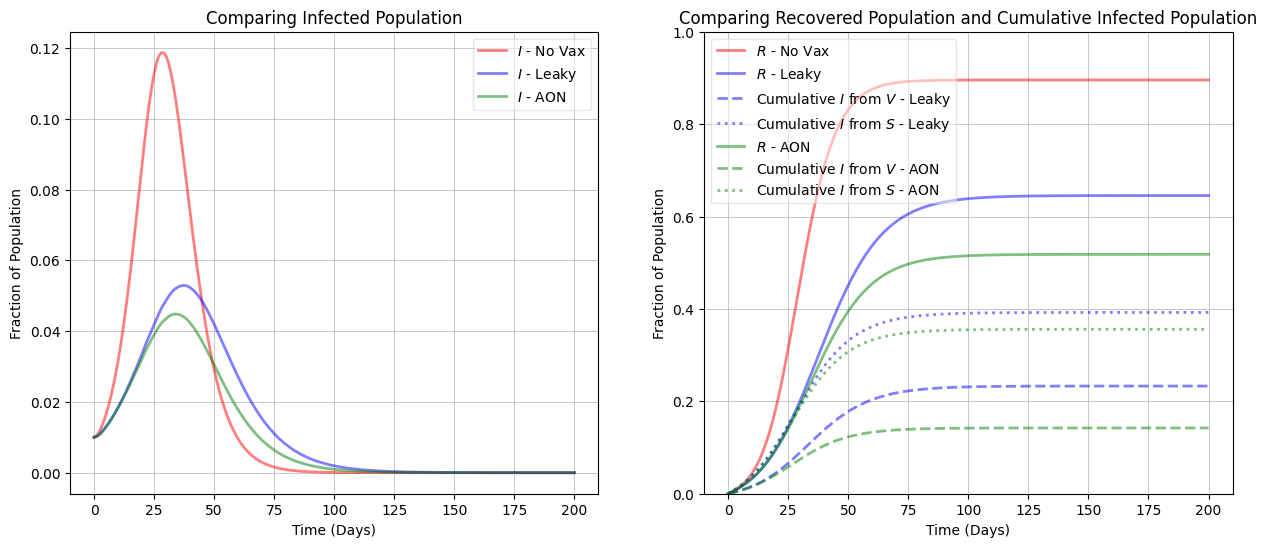

In [28]:
# set parameter values
R0 = 2.5
sigma = 1 / 4
gamma = 1 / 4
beta = R0 * gamma
eps = 0.6
fc = 1 / eps * (1 - 1 / R0)
w = 0
t = 200
tv = -1 # vaccine administered before epidemic (R = 0)

# set initial conditions
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
fv = 0.5 * s0
y0 = [s0, e0, i0, r0]

# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series/time-series_size0_fv50.pdf', format='pdf', bbox_inches='tight')

## Scenario 2. $t_V: R=0$, $f_V$: 75% of $(1 - f_R)$

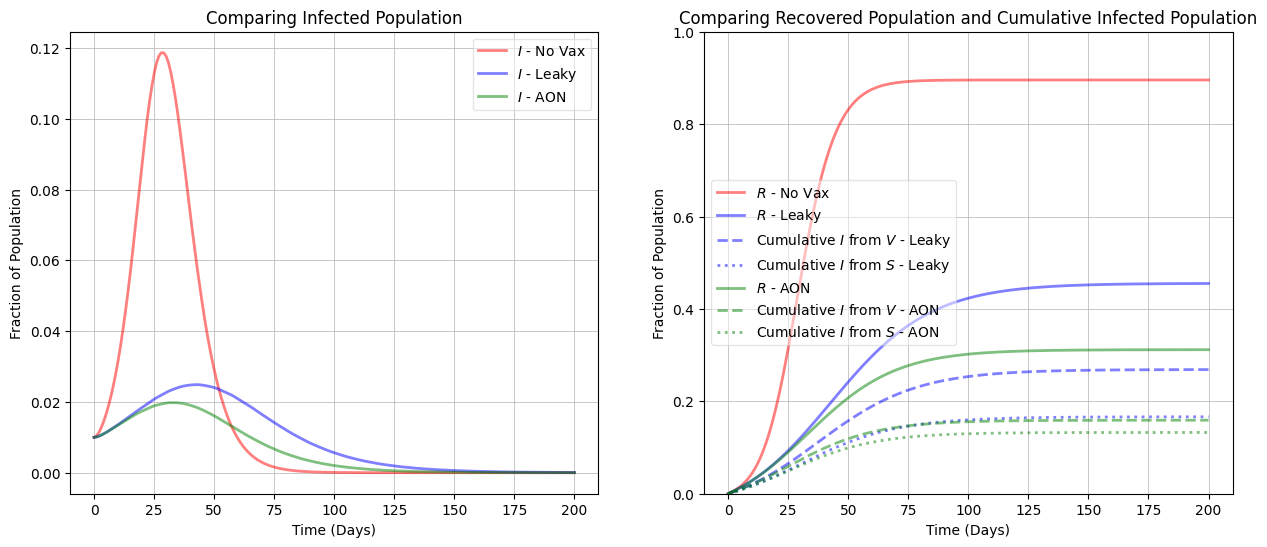

In [29]:
# set parameter values
R0 = 2.5
sigma = 1 / 4
gamma = 1 / 4
beta = R0 * gamma
eps = 0.6
fc = 1 / eps * (1 - 1 / R0)
w = 0
t = 200
tv = -1 # vaccine administered before epidemic (R = 0)

# set initial conditions
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
fv = 0.75 * s0
y0 = [s0, e0, i0, r0]

# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series/time-series_size0_fv75.pdf', format='pdf', bbox_inches='tight')

## Scenario 3. $t_V: R=0$, $f_V$: 100% of $(1 - f_R)$

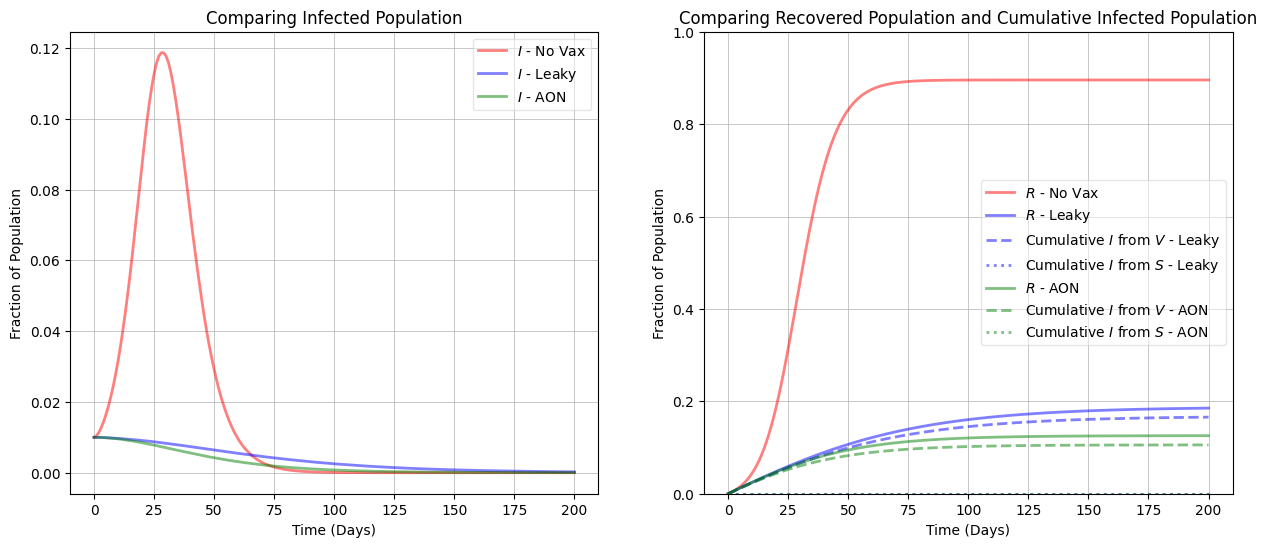

In [30]:
# set parameter values
R0 = 2.5
sigma = 1 / 4
gamma = 1 / 4
beta = R0 * gamma
eps = 0.6
fc = 1 / eps * (1 - 1 / R0)
w = 0
t = 200
tv = -1 # vaccine administered before epidemic (R = 0)

# set initial conditions
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
fv = s0
y0 = [s0, e0, i0, r0]

# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series/time-series_size0_fv100.pdf', format='pdf', bbox_inches='tight')

## Scenario 4. $t_V: R=0.1$, $f_V$: 50% of $(1 - f_R)$

In [31]:
### find tv
# set parameter values
R0 = 2.5
sigma = 1 / 4
gamma = 1 / 4
beta = R0 * gamma
eps = 0.6
w = 0
t = 200

# set initial conditions
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
y0 = [s0, e0, i0, r0]

# run seir model (with no vaccination) until R = 0.1
def _reach_size10(t, y, beta, sigma, gamma):
    return y[3] - 0.1


_reach_size10.terminate = True

sol = solve_ivp(
    seir, [0, t], y0, args=(beta, sigma, gamma), events=_reach_size10, dense_output=True
)

# get tv, fv
tv = int(np.round(np.ravel(np.array(sol.t_events))[0]))
s_temp = np.ravel(np.array(sol.y_events[0]))[0] # remaining S at tv
fv = 0.5 * s_temp

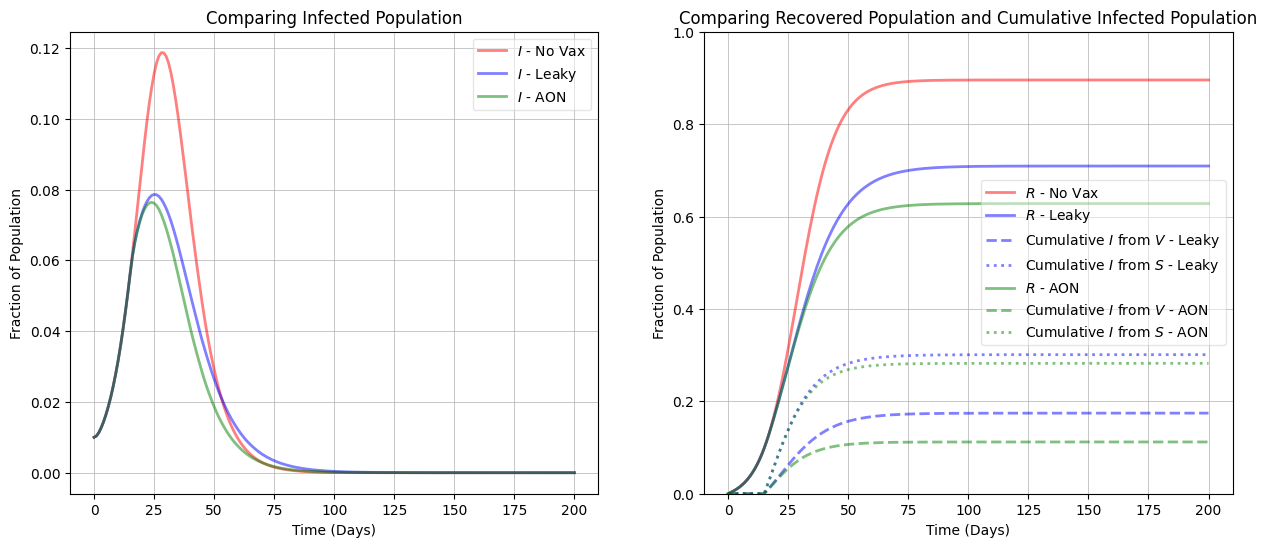

In [32]:
# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series/time-series_size10_fv50.pdf', format='pdf', bbox_inches='tight')

## Scenario 5. $t_V: R=0.1$, $f_V$: 75% of $(1 - f_R)$

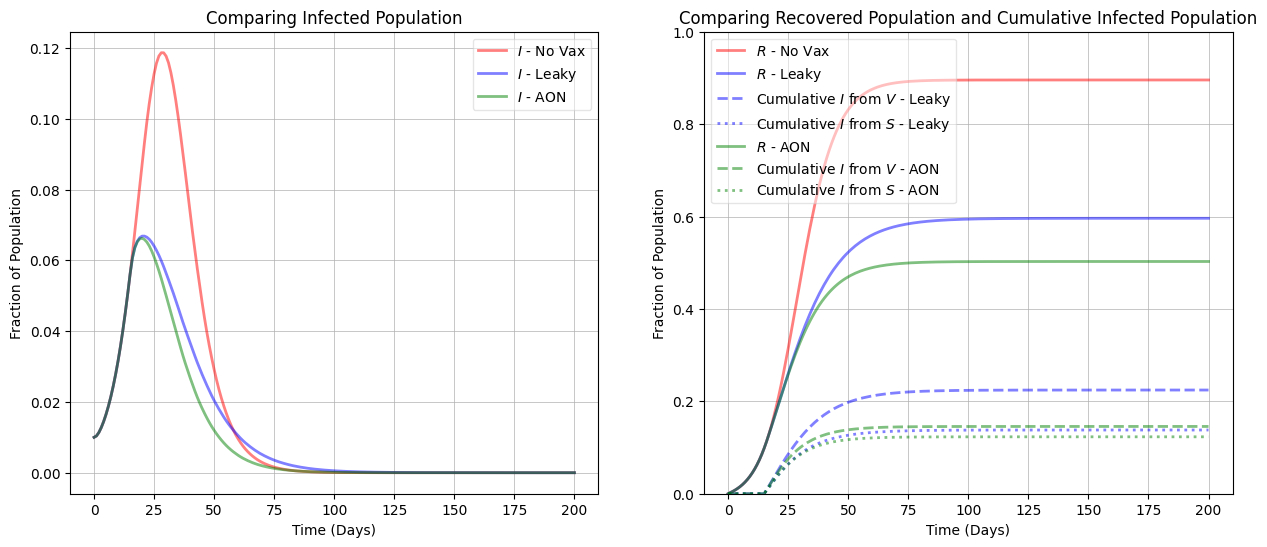

In [33]:
# set fv
fv = 0.75 * s_temp

# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series/time-series_size10_fv75.pdf', format='pdf', bbox_inches='tight')

## Scenario 6. $t_V: R=0.1$, $f_V$: 100% of $(1 - f_R)$

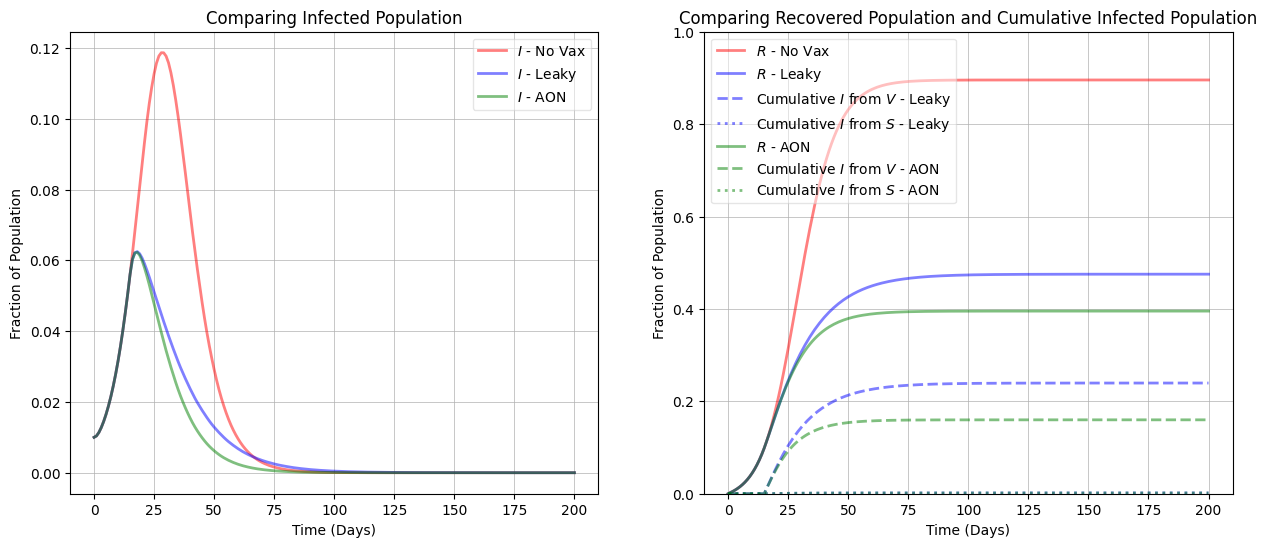

In [34]:
# set fv
fv = s_temp

# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series/time-series_size10_fv100.pdf', format='pdf', bbox_inches='tight')

## Scenario 7. $t_V: R=0.25$, $f_V$: 50% of $(1 - f_R)$

In [35]:
### find tv
# set parameter values
R0 = 2.5
sigma = 1 / 4
gamma = 1 / 4
beta = R0 * gamma
eps = 0.6
w = 0
t = 200

# set initial conditions
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
y0 = [s0, e0, i0, r0]

# run seir model (with no vaccination) until R = 0.25
def _reach_size25(t, y, beta, sigma, gamma):
    return y[3] - 0.25


_reach_size25.terminate = True

sol = solve_ivp(
    seir, [0, t], y0, args=(beta, sigma, gamma), events=_reach_size25, dense_output=True
)

# get tv, fv
tv = int(np.round(np.ravel(np.array(sol.t_events))[0]))
s_temp = np.ravel(np.array(sol.y_events[0]))[0] # remaining S at tv
fv = 0.5 * s_temp

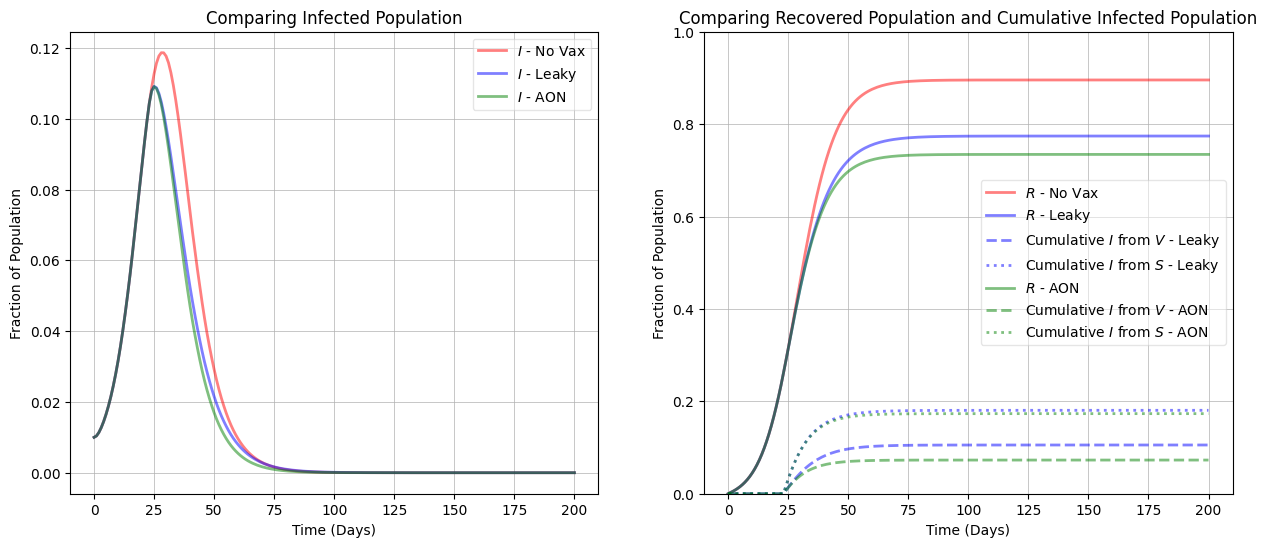

In [36]:
# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series/time-series_size25_fv50.pdf', format='pdf', bbox_inches='tight')

## Scenario 8. $t_V: R=0.25$, $f_V$: 75% of $(1 - f_R)$

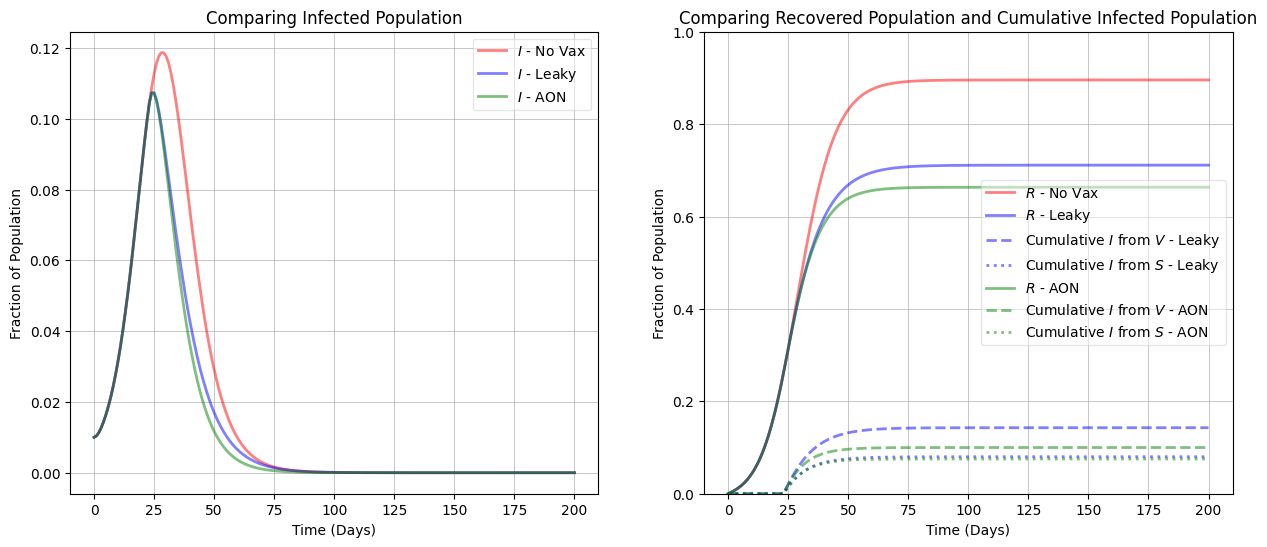

In [37]:
# set fv
fv = 0.75 * s_temp

# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series/time-series_size25_fv75.pdf', format='pdf', bbox_inches='tight')

## Scenario 9. $t_V: R=0.25$, $f_V$: 100% of $(1 - f_R)$

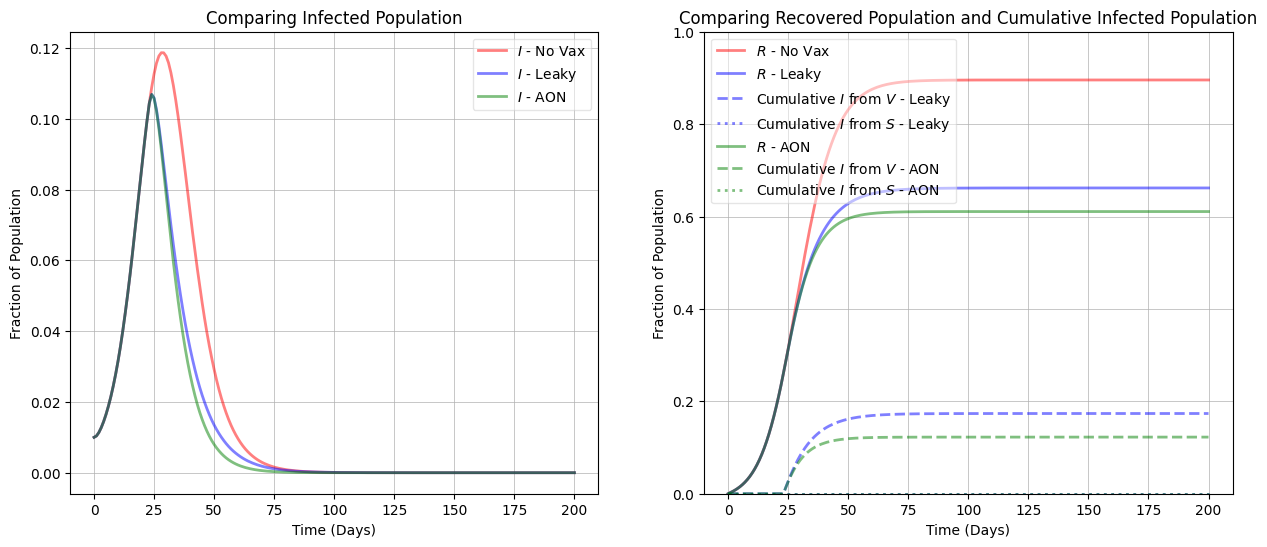

In [38]:
# set fv
fv = s_temp

# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series/time-series_size25_fv100.pdf', format='pdf', bbox_inches='tight')

# Time-Series Plots - Continuous Vaccination


## Scenario 1_cont. $t_V: R=0$, $f_V$: 50% of $(1 - f_R)$

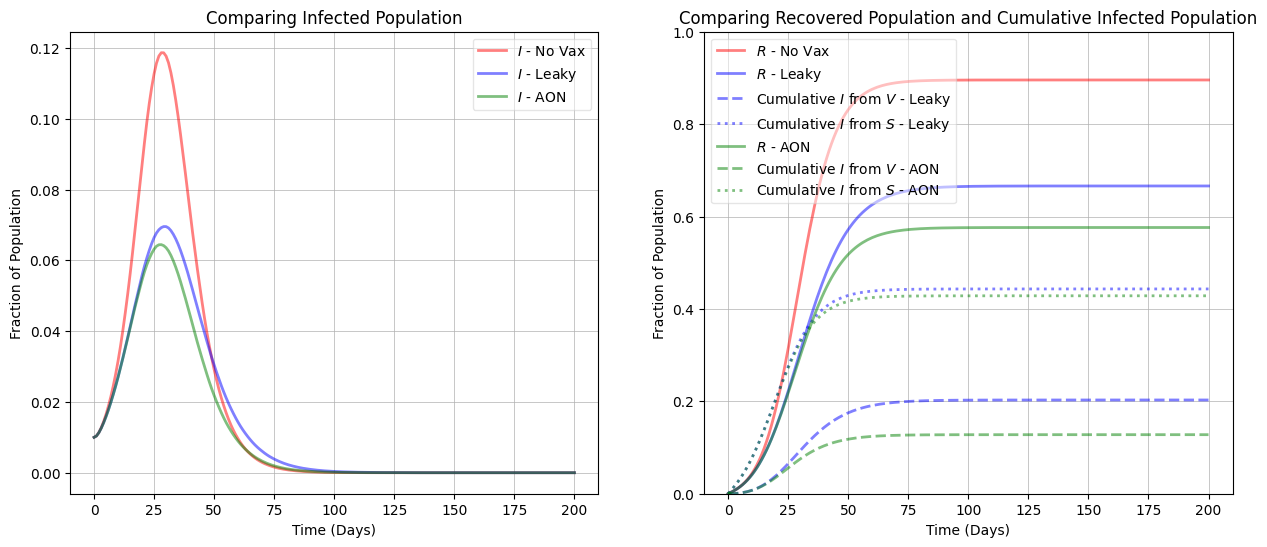

In [42]:
# set parameter values
R0 = 2.5
sigma = 1 / 4
gamma = 1 / 4
beta = R0 * gamma
eps = 0.6
fc = 1 / eps * (1 - 1 / R0)
w = 0
t = 200
tv = -1 # vaccine administered before epidemic (R = 0)
v = 0.05

# set initial conditions
s0 = 0.98
e0 = 0.01
i0 = 0.01
r0 = 0
fv = 0.5 * s0
y0 = [s0, e0, i0, r0]

# no vaccination
sol = solve_ivp(
    seir,
    [0, t],
    y0,
    args=(beta, sigma, gamma),
    dense_output=True,
    t_eval=np.linspace(0, t, t + 1),
)

### run model
# leaky
sim_leaky = run_modified_seir_cont(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    v=v,
    mode="leaky",
)

# aon
sim_aon = run_modified_seir_cont(
    y0=y0,
    t=t,
    tv=tv,
    beta=beta,
    sigma=sigma,
    gamma=gamma,
    w=w,
    fv=fv,
    eps=eps,
    v=v,
    mode="aon",
)

### plot time-series plot
plt.rcParams["pdf.fonttype"] = 42
fig = plot_timeseries_cat(sol.y, sim_leaky, sim_aon)
plt.savefig('Figures/Time-series-cont/time-series_size0_fv50.pdf', format='pdf', bbox_inches='tight')

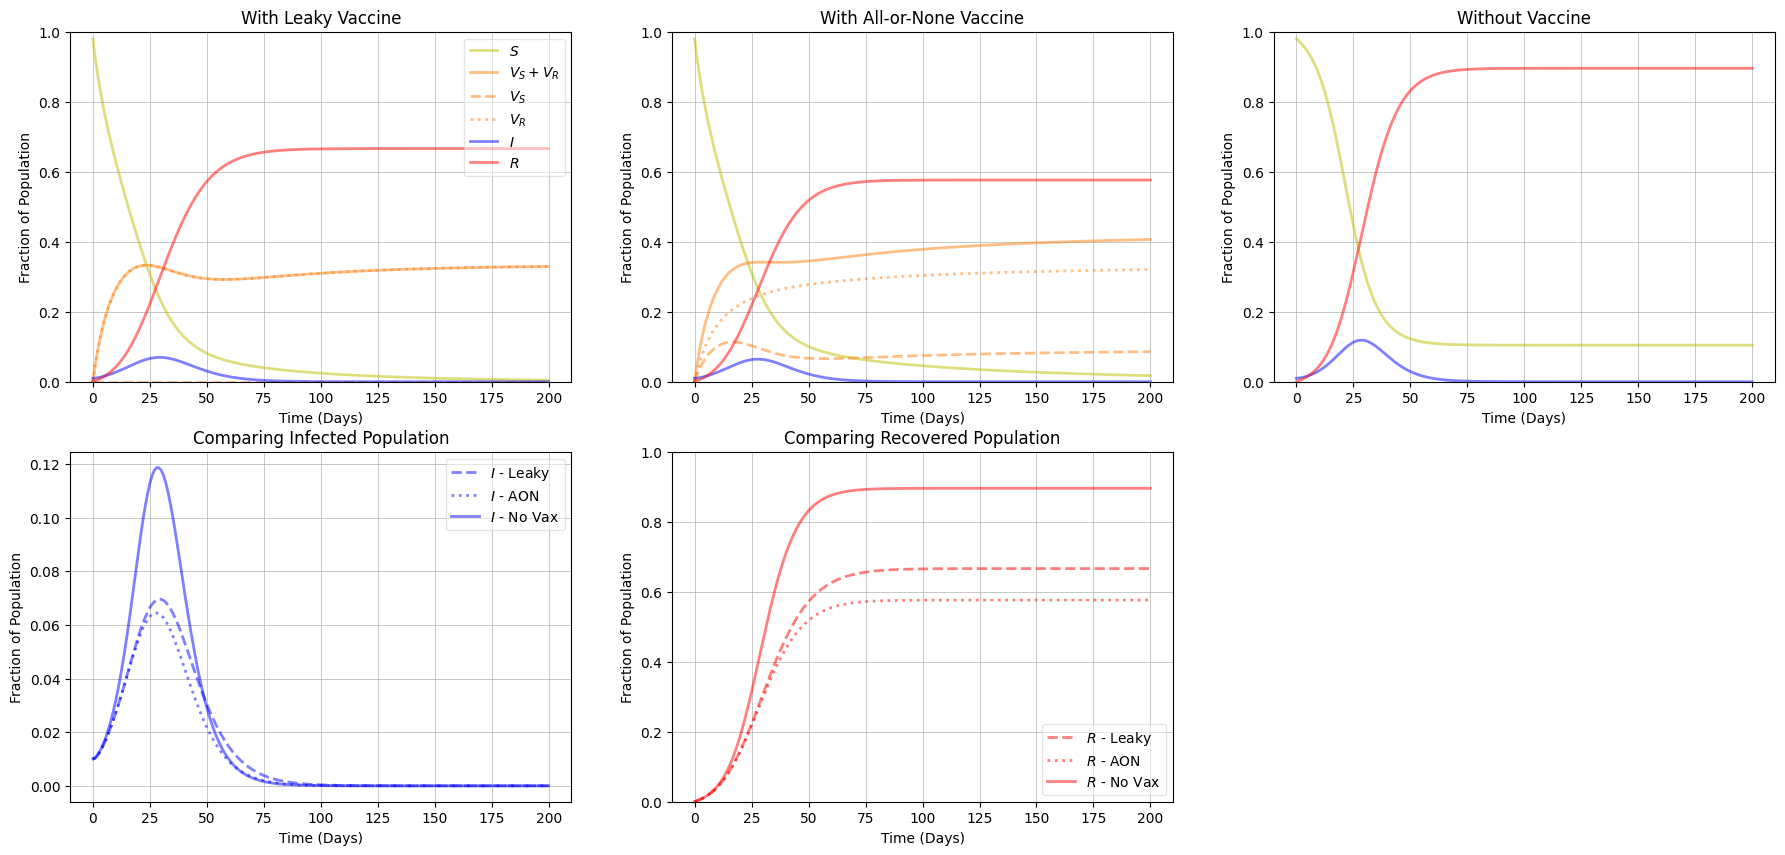

In [45]:
fig = plot_timeseries(sol.y, sim_leaky, sim_aon)